In [50]:
# coding=utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import neattext.functions as nfx
import re
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix, classification_report

In [51]:
df = pd.read_csv("Kannada_Senetences_Label.csv",header=None,names=["text","type"])
df["value"]=df['type'].map({"EMOTION":1,"NOEMOTION":-1})
df=df.dropna(axis=0)
df.head()

,text,type,value
1,ನನ್ನ ಜೀವನದಲ್ಲಿ ಸದಾ ಶಾಂತಿ ಇರುತ್ತದೆ,EMOTION,1.0
2,ನಾನು ಇಂದು ಮನಸ್ಸು ತುಂಬಾ ಕೆಳಗಿಳಿದಿದ್ದೇನೆ,EMOTION,1.0
3,ನನಗೆ ಇನ್ನೂ ತುಂಬಾ ಕೆಲಸವಿದೆ,NOEMOTION,-1.0
4,ನನ್ನ ಮುಖ ಬಹಳ ಕಿರುಚಿದೆ,EMOTION,1.0
5,ನಾನು ಸಂತೋಷ್,NOEMOTION,-1.0


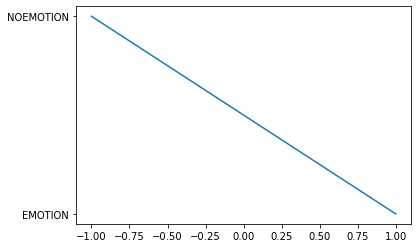

In [52]:
plt.plot(df['value'],df['type'])
plt.show()

In [53]:
df.shape

(271, 3)

In [43]:
df['text']=df['text'].astype('string')
df.dtypes

text      string
type      object
value    float64
dtype: object

In [45]:
df.isnull().sum()

text     0
type     0
value    0
dtype: int64

<AxesSubplot:>

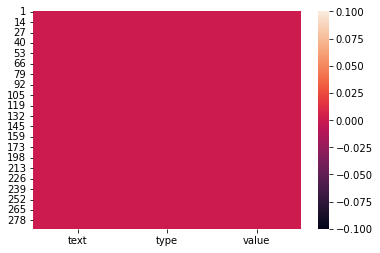

In [15]:
#to check null values
sns.heatmap(df.isnull())  

In [16]:
df['type']=df['type'].interpolate()
df['text']=df['text'].astype('string')
df.dtypes

text      string
type      object
value    float64
dtype: object

In [17]:
#value counts of emotions
df['type'].value_counts()

EMOTION      161
NOEMOTION    110
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

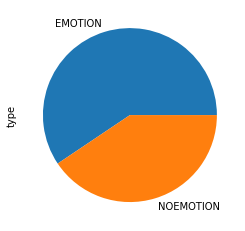

In [18]:
df['type'].value_counts().plot(kind='pie')

# preprocessing function

In [58]:
# Define the preprocessing function
def preprocess_text(text):
    # remove punctuations and special characters
    #text = re.sub(r'[^\w\s]', '', text)
    text=text.lower()
    # initializing punctuations,special chacrters A-Z,1-0 string
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~abcdefghijklmnopqrstuvwxyz1234567890'''
    
    for ele in text:
        if ele in punc:
            text = text.replace(ele, "")
    
    text = re.sub(r'\s+', ' ', text).strip()
    # remove stop words manually
    #s_words=set()
    #stop_words = ["ನನ್ನ","ಅದು", "ಅವನು", "ಅವರು", "ಆಗಿದೆ", "ಆಗಿದ್ದು","ನಾನು","ಇದು", "ಇವರು", "ಈ", "ಈಗ", "ಈಗಿನ", "ಉಂಟು", "ಉದ್ದೇಶಿಸಿದ್ದೇನಿದು", "ಉದ್ದೇಶಿಸಿದೇನೆ", "ಉದ್ದೇಶಿಸಿದ್ದೇನೆ", "ಉದ್ದೇಶ್ಯದಿಂದ", 			"ಉದ್ದೇಶ್ಯವನ್ನು", "ಉದ್ದೇಶ್ಯವಾಗಿ", "ಉದ್ದೇಶ್ಯವಿದೆ", "ಉದ್ದೇಶ್ಯವು", "ಉಪಯೋಗಿಸಲಾಗಿದೆ", "ಉಪಯೋಗಿಸಲಾಗುತ್ತದೆ", "ಉಪಯೋಗಿಸಲು", "ಉಪಯೋಗಿಸಿ", "ಉಪಯೋಗಿಸುವ", "ಉಪಯೋಗಿಸುವುದು", 	"ಉಪಯೋಗಿಸುವೆವು", "ಉಪಯೋಗಿಸುವುದೇನೆ", "ಉಪಯೋಗಿಸುವುದೇವೆ", "ಉಪಯೋಗಿಸು","ನಾನೇಗೆ"]

    words = text.split()
    filtered_words = [word for word in words ]
    return " ".join(filtered_words)


# NAVIES

In [59]:
#Preprocess the data
def preprocess(text):
    # Remove stopwords, special characters, and digits

    #stop_words = ["ನನ್ನ","ಅದು", "ಅವನು","ನಾನೇಗೆ", "ಅವರು", "ಆಗಿದೆ", "ಆಗಿದ್ದು","ನಾನು","ಇದು", "ಇವರು", "ಈ", "ಈಗ", "ಈಗಿನ", "ಉಂಟು", "ಉದ್ದೇಶಿಸಿದ್ದೇನಿದು", "ಉದ್ದೇಶಿಸಿದೇನೆ"]
    stop_words=[]
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ''.join([word for word in text if word not in string.punctuation])
    text = re.sub(r'\d+', '', text)
    # Tokenize the text and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    words = text.split()
    filtered_words = [word for word in words ]
    return " ".join(filtered_words)


df['text'] = df['text'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, random_state=10)

# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes algorithm
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the algorithm's performance
y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

# Use the model to predict the emotion of new text data
new_text = ["ನನಗೆ ತುಂಬಾ ಪ್ರೀತಿ ಇದೆjah1","ನಾನು ಸಂತೋಷದ ಮನುಷ್ಯ",'ನನಗೆ ಖುಷಿ ಇದೆ','ನನ್ನ ಹೆಸರು ಸಂತೋಷ' ,'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ','ನಾನು ಸಂತೋಷ್',"ನಾನೇಗೆ","ಕೋಪದ ಸಮಸ್ಯೆ ಕಡಿಮೆಯಾಗುತದೆ","ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ"]
new_text = [preprocess_text(text) for text in new_text]
print(new_text)
new_text = vectorizer.transform(new_text)
y_pred = nb.predict(new_text)
print('Predictions:', y_pred)

Accuracy: 0.7090909090909091
Confusion matrix:
 [[29  4]
 [12 10]]
Classification report:
               precision    recall  f1-score   support

     EMOTION       0.71      0.88      0.78        33
   NOEMOTION       0.71      0.45      0.56        22

    accuracy                           0.71        55
   macro avg       0.71      0.67      0.67        55
weighted avg       0.71      0.71      0.69        55

['ನನಗೆ ತುಂಬಾ ಪ್ರೀತಿ ಇದೆ', 'ನಾನು ಸಂತೋಷದ ಮನುಷ್ಯ', 'ನನಗೆ ಖುಷಿ ಇದೆ', 'ನನ್ನ ಹೆಸರು ಸಂತೋಷ', 'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ', 'ನಾನು ಸಂತೋಷ್', 'ನಾನೇಗೆ', 'ಕೋಪದ ಸಮಸ್ಯೆ ಕಡಿಮೆಯಾಗುತದೆ', 'ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ']
Predictions: ['EMOTION' 'EMOTION' 'EMOTION' 'NOEMOTION' 'EMOTION' 'EMOTION' 'EMOTION'
 'NOEMOTION' 'EMOTION']


# SVM

In [21]:
# Preprocess the text data
df['text'] = df['text'].apply(preprocess_text)

# Convert the emotion labels to numerical values


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['type'], test_size=0.2, random_state=10)

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a machine learning model
svm_clf = LinearSVC()
svm_clf.fit(X_train_tfidf, y_train)

# Predict the emotions of the testing dat a
y_pred = svm_clf.predict(X_test_tfidf)

# Print the accuracy score of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

# Use the model to predict the emotion of new text data
new_text = ['ನನಗೆ ಖುಷಿ ಇದೆ','ನನ್ನ ಹೆಸರು ಸಂತೋಷ' ,'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ','ನಾನು ಸಂತೋಷ್',"ನಾನೇಗೆ","ಕೋಪದ ಸಮಸ್ಯೆ ಕಡಿಮೆಯಾಗುತದೆ","ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ"]
new_text = [preprocess_text(text) for text in new_text]
new_text = tfidf_vectorizer.transform(new_text)
y_pred = svm_clf.predict(new_text)
print('Predictions:', y_pred)

Accuracy: 0.5636363636363636
Confusion matrix:
 [[23 10]
 [14  8]]
Classification report:
               precision    recall  f1-score   support

     EMOTION       0.62      0.70      0.66        33
   NOEMOTION       0.44      0.36      0.40        22

    accuracy                           0.56        55
   macro avg       0.53      0.53      0.53        55
weighted avg       0.55      0.56      0.55        55

Predictions: ['EMOTION' 'NOEMOTION' 'NOEMOTION' 'EMOTION' 'EMOTION' 'NOEMOTION'
 'NOEMOTION']


# Navies

In [22]:
# #Preprocess the data
def preprocess(text):
    # Remove stopwords, special characters, and digits
    #stop_words = ["ನನ್ನ","ಅದು", "ಅವನು", "ಅವರು", "ಆಗಿದೆ", "ಆಗಿದ್ದು","ನಾನು","ಇದು", "ಇವರು", "ಈ", "ಈಗ", "ಈಗಿನ", "ಉಂಟು", "ಉದ್ದೇಶಿಸಿದ್ದೇನಿದು", "ಉದ್ದೇಶಿಸಿದೇನೆ"]
    #text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ''.join([word for word in text if word not in string.punctuation])
    text = re.sub(r'\d+', '', text)
    # Tokenize the text and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

df['text'] = df['text'].apply(preprocess)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['value'], test_size=0.2, random_state=10)

# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes algorithm
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate the algorithm's performance
y_pred = nb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))
print("Precesionvalue is value :",precision_score(y_test, y_pred))
print("Recal value :",recall_score(y_test, y_pred))
# Use the model to predict the emotion of new text data
new_text = ['ನನಗೆ ಖುಷಿ ಇದೆ','ನನ್ನ ಹೆಸರು ಸಂತೋಷ' ,'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ','ನಾನು ಸಂತೋಷ್',"ನಾನೇಗೆ","ಕೋಪದ ಸಮಸ್ಯೆ ಕಡಿಮೆಯಾಗುತದೆ","ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ"]
new_text = [preprocess_text(text) for text in new_text]
new_text = vectorizer.transform(new_text)
y_pred = nb.predict(new_text)
print('Predictions:', y_pred)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\shukl/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\shukl\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


# Random forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
#Preprocess the data
def preprocess_s(text):
    # Remove stopwords, special characters, and digits
    #stop_words = ["ನನ್ನ","ಅದು", "ಅವನು", "ಅವರು", "ಆಗಿದೆ", "ಆಗಿದ್ದು","ನಾನು","ಇದು", "ಇವರು", "ಈ", "ಈಗ", "ಈಗಿನ", "ಉಂಟು", "ಉದ್ದೇಶಿಸಿದ್ದೇನಿದು", "ಉದ್ದೇಶಿಸಿದೇನೆ"]
    stop_words=[]
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ''.join([word for word in text if word not in string.punctuation])
    text = re.sub(r'\d+', '', text)
    # Tokenize the text and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

df['text'] = df['text'].apply(preprocess_s)

# Create TF-IDF features from text column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['type'], test_size=0.2, random_state=10)

# Train a random forest classifier on the training set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

# Print predicted sentiment for each test data point
for i in range(10):
    print('Text:', df['text'][X_test.indices[i]])
    print('Predicted sentiment:', y_pred[i])
    print("\n")

# Linear regression

In [ ]:
#Preprocess the data
def preprocess_s(text):
    # Remove stopwords, special characters, and digits
    #stop_words = ["ನನ್ನ","ಅದು", "ಅವನು", "ಅವರು", "ಆಗಿದೆ", "ಆಗಿದ್ದು","ನಾನು","ಇದು", "ಇವರು", "ಈ", "ಈಗ", "ಈಗಿನ", "ಉಂಟು", "ಉದ್ದೇಶಿಸಿದ್ದೇನಿದು", "ಉದ್ದೇಶಿಸಿದೇನೆ"]
    stop_words=[]
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ''.join([word for word in text if word not in string.punctuation])
    text = re.sub(r'\d+', '', text)
    # Tokenize the text and convert to lowercase
    tokens = nltk.word_tokenize(text.lower())
    
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

df['string']=df['text'].astype('string')
df['string']=df['string'].apply(preprocess_s)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["value"].values.reshape(-1, 1), df['value'].values.reshape(-1, 1), test_size=0.2, random_state=10)

clf=LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test,y_test)
# Use the model to predict the emotion of new text data
new_text = ['ನನಗೆ ಖುಷಿ ಇದೆ', 'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ','ನನ್ನ ಸಂತೋಷ',"ಕೋಪದ ಸಮಸ್ಯೆ ಕಡಿಮೆಯಾಗುತದೆ","ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ"]
new_text = [preprocess_text(text) for text in new_text]
new_text = vectorizer.transform(new_text)
print(new_text)
y_pred = clf.predict(X_train)
print('Predictions:', y_pred)

In [61]:
import re

def bigrams(s):
    # Replace all none alphanumeric characters with spaces
    #s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    token=nltk.word_tokenize(s)
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    ngrams = zip(*[token[i:] for i in range(2)])
    result=[" ".join(ngram) for ngram in ngrams]
    print(result)
    return "aljalja"

df['text'] = df['text'].apply(bigrams)
# Use the model to predict the emotion of new text data
#new_text = ['ನನಗೆ ಖುಷಿ ಇದೆ', 'ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ','ನಾನು ಸಂತೋಷ್',"ನಾನೇಗೆ","ನನ್ನ ತಂದೆ ತಾಯಿ ಪ್ರೀತಿ ಆಶೀರ್ವಾದ ನನ್ನ ಶಕ್ತಿ"]
s="ನನ್ನ ಕೋಪ ತಗ್ಗಿದೆ"
new_text = bigrams(s)


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\shukl/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\shukl\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
